### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the lesson: 

**Satellite Imagery Analysis II - Sundarbans**

---

#### Problem Statement

As a data scientist using remote sensing data, track changes in vegetation using NDVI that are affected by the fire, understand the area and intensity of fires. 

After the analysis, necessary measures can be submitted to the government or forest authorities to make those land green again.

---

#### Dataset Description

The Cold Springs wildfire was first reported on July 9, 2016, along with Hurricane Hill, approximately two miles northeast of Nederland, Colorado, US. The Landsat Program is a series of Earth-observing satellite missions jointly managed by NASA and the U.S. Geological Survey. So, we will work on the images taken by Landsat during Cold Springs Wildfire.

The naming Convention followed by Landsat is: 

**LXSS_LLLL_PPPRRR_YYYYMMDD_yyyymmdd_CC_TX**

Where, 
    
    L = Landsat
    X = Sensor Used 
    SS = Satellite 
    LLLL = Processing correction level
    PPP = WRS path
    RRR = WRS row
    YYYYMMDD = Acquisition year, month, day
    yyyymmdd - Processing year, month, day
    CC = Collection number
    TX = Collection category
    
Example:  **LC08_L1GT_029030_20151209_20160131_01_RT**

Means: Landsat 8; OLI/TIRS combined; processing correction level L1GT; path 029; row 030; acquired December 9, 2015; processed January 31, 2016; Collection 1; Real-Time

**Dataset source:** https://figshare.com/articles/dataset/Earth_Analytics_Cold_Springs_Fire_Remote_Sensing_Data/6083210

---

### List of Activities
 
**Activity 1:** Import Modules and Read Data

**Activity 2:** Plotting NDVI

---

#### Activity 1: Import Modules and Read Data

1. Import the necessary Python modules and download the `cold-springs-fire` dataset from the `earthpy` package.

2. Get the files containing the word `band` and that end with `.tif` using `glob()` function. 

In [ ]:
# Install 'earthpy' package
! pip install earthpy

     |████████████████████████████████| 1.4 MB 7.7 MB/s 
     |████████████████████████████████| 19.3 MB 439 kB/s 
     |████████████████████████████████| 1.0 MB 61.3 MB/s 
     |████████████████████████████████| 6.3 MB 32.6 MB/s 
     |████████████████████████████████| 16.7 MB 19.8 MB/s 


Download `cold-springs-fire` dataset from `earthpy` package.

In [ ]:
# Import the 'earthpy' library
import earthpy as ep

# Specify a custom directory for data downloads using the 'path' attribute.
ep.data.path = "."

# Specify the dataset name to download using 'data.get_data()' function.
ep.data.get_data("cold-springs-fire")

Extracted output to ./cold-springs-fire/.


'./cold-springs-fire/.'

Get files containing the word `band` and that end with `.tif`.

Steps to obtain the files:
1. Import `glob` module as `gb`.

2. Use `glob()` function of `gb` and pass the pattern of the file name. 

  The pattern would be: `cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/*band*.tif`

3. Sort the files and display the extracted paths.

In [ ]:
# Import the 'glob' library
import glob as gb

# Grab files containing the word "band" and that end with .tif
landsat_path = gb.glob("cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/*band*.tif")

# Sort the Bands
landsat_path.sort()
landsat_path

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']

Creating a stacked image using `stack()` function.

To create an image stack for Landsat data, perform the following steps:

1. Import `earthpy.spatial` as `es`.
2. Call `stack()` function and pass the sorted list of 7 spectral bands as input to this function. And store result in 2 variables (stacked array and metadata).
3. Create a `for` loop with metadata and print each feature in the stacked array.

In [ ]:
# Import the 'earthpy.spatial' library
import earthpy.spatial as es

# Create image stack for Landsat
arr_st, meta = es.stack(landsat_path)

# Print the metadata 
for key,value in meta.items():
  print(f"{key} : {value}")

driver : GTiff
dtype : int16
nodata : -32768.0
width : 246
height : 177
count : 7
crs : EPSG:32613
transform : | 30.00, 0.00, 455655.00|
| 0.00,-30.00, 4428465.00|
| 0.00, 0.00, 1.00|
tiled : False
compress : lzw
interleave : band


**Q:** What is the width and height of the dataset?

**A:** Width=246 and height=177.



---



#### Activity 2: Plotting NDVI

Plotting NDVI (Normalized Difference Vegetation Index) to show the green areas.

Steps to plot NDVI :
1. Import `earthpy.plot` and `matplotlib.pyplot`.

2. Calculate NDVI using `normalized_diff()` function of `earthpy.spatial` with input as Band 5 and Band 4 (4th and 3rd index of the stacked array).

3. Plot using `plot_bands()` function of `earthpy.plot` passing the calculated NDVI, a suitable title, `cmap = 'RdYlGn'`, `vmin = -1`, and `vmax = 1`.

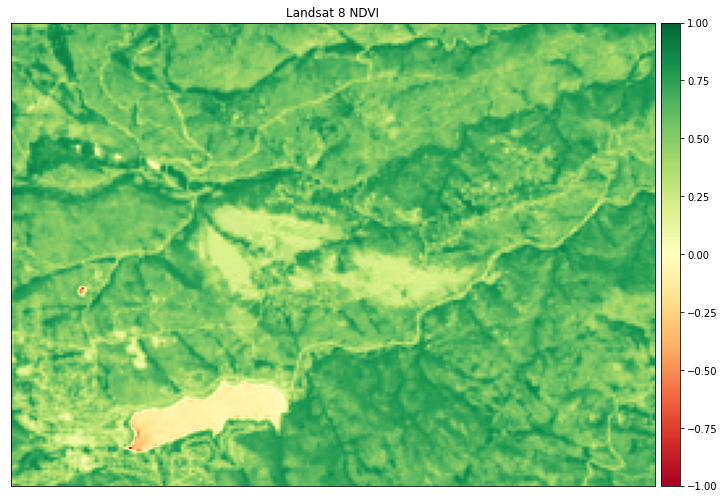

In [ ]:
# Import 'earthpy.plot' and 'matplotlib.pyplot' 
import earthpy.plot as epp
import matplotlib.pyplot as plt

# Calculate NDVI 
ndvi = es.normalized_diff(arr_st[4], arr_st[3])

# Plot the NDVI 
epp.plot_bands(ndvi, title ='Landsat 8 NDVI', cmap = "RdYlGn", vmin = -1, vmax = 1)
plt.show()

**Q:** Which portion shows the affected land?

**A:** The yellow portion.



---

